In [3]:
import pandas as pd
import numpy as np
from sklearn import cluster

data = pd.read_csv(r'C:\Users\SREEJA\OneDrive\Desktop\Credit-card clustering\CC GENERAL.csv')
print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data = data.dropna()

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


clustering_data = data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]].copy() #added .copy() to avoid potential slice issues


scaler = MinMaxScaler()
clustering_data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]] = scaler.fit_transform(clustering_data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]])

kmeans = KMeans(n_clusters=5, n_init=10) # Explicitly set n_init
clusters = kmeans.fit_predict(clustering_data)
data["CREDIT_CARD_SEGMENTS"] = clusters

print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [8]:
data["CREDIT_CARD_SEGMENTS"] = data["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"})
print(data["CREDIT_CARD_SEGMENTS"].head(10))

0     Cluster 4
1     Cluster 2
2     Cluster 2
4     Cluster 4
5     Cluster 4
6     Cluster 5
7     Cluster 4
8     Cluster 1
9     Cluster 5
10    Cluster 4
Name: CREDIT_CARD_SEGMENTS, dtype: object


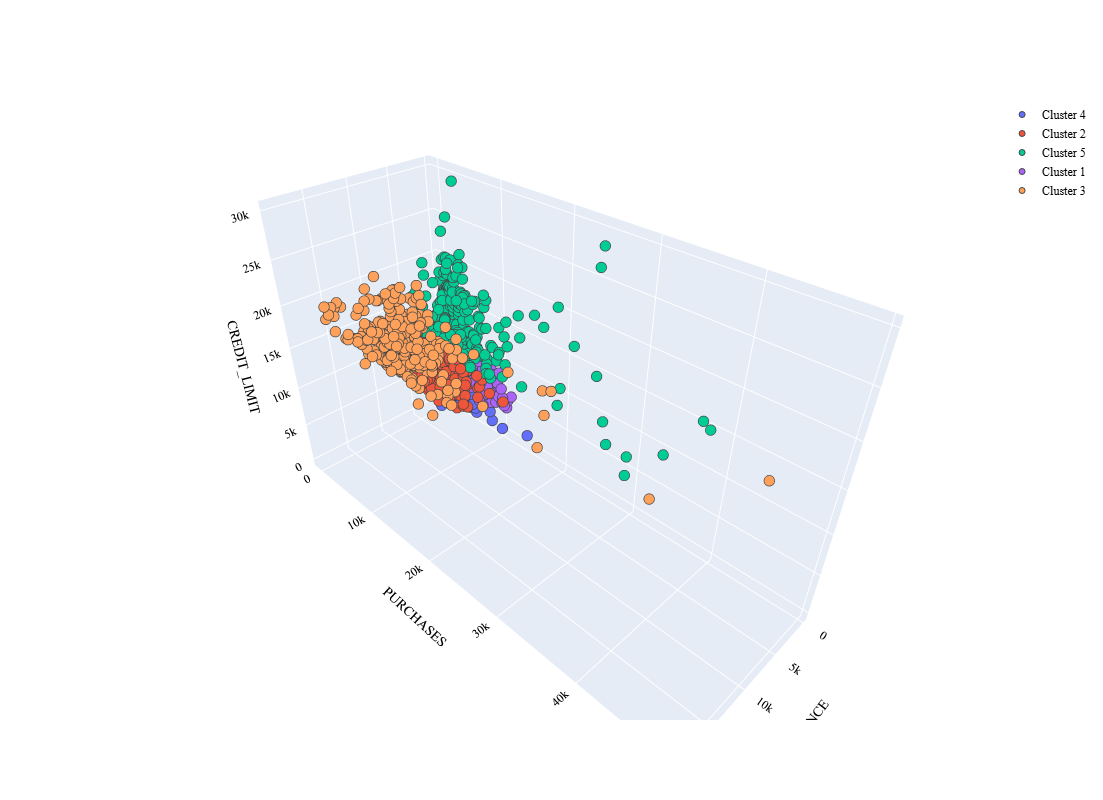

In [10]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["CREDIT_CARD_SEGMENTS"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["CREDIT_CARD_SEGMENTS"]== i]['BALANCE'],
                                y = data[data["CREDIT_CARD_SEGMENTS"] == i]['PURCHASES'],
                                z = data[data["CREDIT_CARD_SEGMENTS"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))